In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from scipy.stats import norm
from scipy import stats
from sklearn.linear_model import (LinearRegression as LR, Ridge, Lasso)

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train = pd.read_csv("train.csv")

In [3]:
train.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [4]:
train.shape

(1460, 81)

In [5]:
test = pd.read_csv("test.csv")

In [6]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [7]:
test.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal
1458,2919,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,11,2006,WD,Normal


In [8]:
test.shape

(1459, 80)

# データの連結

In [9]:
y_train = train.SalePrice.values

# 外れ値除去

GrLivAreaに外れ値がある

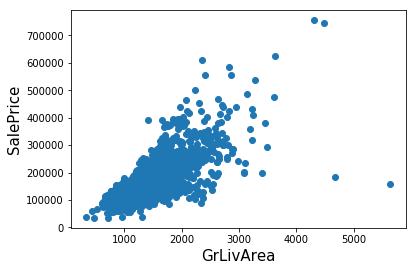

In [10]:
# 外れ値の確認
plt.scatter(x = train["GrLivArea"], y = train["SalePrice"])
plt.ylabel("SalePrice", fontsize = 15)
plt.xlabel("GrLivArea", fontsize = 15 )
plt.show()

In [11]:
# 外れ値除去
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)

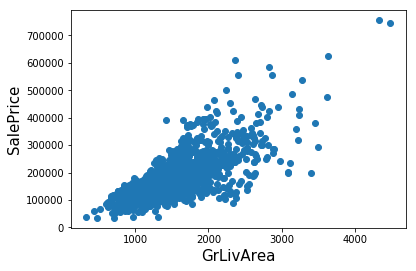

In [12]:
plt.scatter(x = train["GrLivArea"], y = train["SalePrice"])
plt.ylabel("SalePrice", fontsize = 15)
plt.xlabel("GrLivArea", fontsize = 15 )
plt.show()

all_data.drop(['1stFlrSF','GarageArea','TotRmsAbvGrd', 'GarageYrBlt'], axis=1, inplace=True)   
  なぜdropしたかわからない

# 目的変数 # 結果　予測したい変数

C:\Users\koike\Anaconda3\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


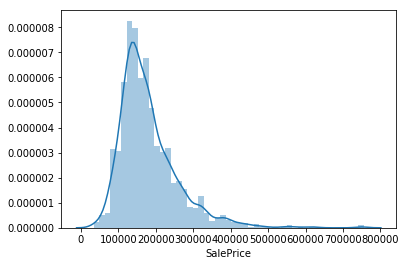

In [13]:
sns.distplot(train['SalePrice'])

# 目的変数のログ変換

In [14]:
# 目的変数を変換して正規分布にしてみる

In [15]:
train["SalePrice"] = np.log1p(train["SalePrice"])

C:\Users\koike\Anaconda3\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


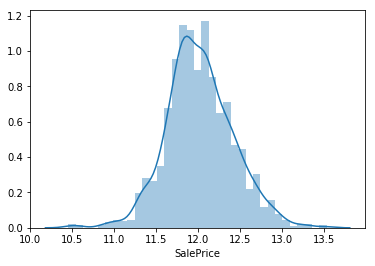

In [16]:
sns.distplot(train['SalePrice'] )

なぜlog変換するのか？ → 弾力性を一定とする

YのXに対する弾力性は，その定義により，
(dY/Y)/(dX/X)……(1)

一方，一般に対数関数logZ,(Z>0)の微分は，dlogZ/dZ=1/Z
これから，
dlogZ=dZ/Z
と書ける。

すると，弾力性の表現(1)は，
(dY/Y)/(dX/X)=dlogY/dlogX
と書ける。
この弾力性が，一定の値βだということは，
dlogY/dlogX=β
この関係は，Yの対数をXの対数に回帰した式
logY=α+βlogX
と整合的。

以上が，弾力性が一定の関係をデータから推定しようとするときに，それぞれの変数の対数をとった回帰式を用いることになる理由。
https://oshiete.goo.ne.jp/qa/2408749.html

この弾力性が，一定の値βだということは，dlogY/dlogX=β
この関係は，Yの対数をXの対数に回帰した式
logY=α+βlogX
と整合的

機械学習における正規分布の効果
予測しようとしている値が正規分布に従った方が精度が良くなる

数字のばらつき、偏りを小さくする

正規化「オーバーフィッティング（過学習）を防止するために値がゼロに近づくようにするテクニック

In [17]:
train.describe() # 基本統計量

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1458.000000,1458.000000,1199.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1450.000000,1458.000000,...,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000
mean,730.251715,56.893004,69.797331,10459.936900,6.093964,5.576132,1971.218107,1984.834019,102.753793,438.827160,...,94.084362,46.245542,21.984225,3.414266,15.081619,2.433471,43.548697,6.323045,2007.816187,12.024015
std,421.601532,42.329437,23.203458,9859.198156,1.376369,1.113359,30.193754,20.641760,179.442156,432.969094,...,125.350021,65.312932,61.155666,29.337173,55.792877,38.209947,496.460799,2.700167,1.328826,0.399713
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,10.460271
25%,365.250000,20.000000,59.000000,7544.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,11.774720
50%,730.500000,50.000000,69.000000,9475.000000,6.000000,5.000000,1972.500000,1994.000000,0.000000,382.000000,...,0.000000,24.500000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,12.001512
75%,1094.750000,70.000000,80.000000,11600.000000,7.000000,6.000000,2000.000000,2004.000000,164.750000,711.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,12.273736
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,2188.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,13.534474


In [18]:
train.info() # データの型の確認

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1458 entries, 0 to 1459
Data columns (total 81 columns):
Id               1458 non-null int64
MSSubClass       1458 non-null int64
MSZoning         1458 non-null object
LotFrontage      1199 non-null float64
LotArea          1458 non-null int64
Street           1458 non-null object
Alley            91 non-null object
LotShape         1458 non-null object
LandContour      1458 non-null object
Utilities        1458 non-null object
LotConfig        1458 non-null object
LandSlope        1458 non-null object
Neighborhood     1458 non-null object
Condition1       1458 non-null object
Condition2       1458 non-null object
BldgType         1458 non-null object
HouseStyle       1458 non-null object
OverallQual      1458 non-null int64
OverallCond      1458 non-null int64
YearBuilt        1458 non-null int64
YearRemodAdd     1458 non-null int64
RoofStyle        1458 non-null object
RoofMatl         1458 non-null object
Exterior1st      1458 non-n

# 各列（カラム）に欠損値があるか確認

In [19]:
train.isnull().any()

Id               False
MSSubClass       False
MSZoning         False
LotFrontage       True
LotArea          False
Street           False
Alley             True
LotShape         False
LandContour      False
Utilities        False
LotConfig        False
LandSlope        False
Neighborhood     False
Condition1       False
Condition2       False
BldgType         False
HouseStyle       False
OverallQual      False
OverallCond      False
YearBuilt        False
YearRemodAdd     False
RoofStyle        False
RoofMatl         False
Exterior1st      False
Exterior2nd      False
MasVnrType        True
MasVnrArea        True
ExterQual        False
ExterCond        False
Foundation       False
                 ...  
BedroomAbvGr     False
KitchenAbvGr     False
KitchenQual      False
TotRmsAbvGrd     False
Functional       False
Fireplaces       False
FireplaceQu       True
GarageType        True
GarageYrBlt       True
GarageFinish      True
GarageCars       False
GarageArea       False
GarageQual 

# 各列に欠損値が幾つあるか確認

In [20]:
train.isnull().sum()[train.isnull().sum() > 0].sort_values(ascending = False)

PoolQC          1452
MiscFeature     1404
Alley           1367
Fence           1177
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

In [21]:
test.isnull().sum()[test.isnull().sum() > 0].sort_values(ascending = False)

PoolQC          1456
MiscFeature     1408
Alley           1352
Fence           1169
FireplaceQu      730
LotFrontage      227
GarageYrBlt       78
GarageCond        78
GarageQual        78
GarageFinish      78
GarageType        76
BsmtCond          45
BsmtExposure      44
BsmtQual          44
BsmtFinType1      42
BsmtFinType2      42
MasVnrType        16
MasVnrArea        15
MSZoning           4
BsmtFullBath       2
BsmtHalfBath       2
Utilities          2
Functional         2
Exterior2nd        1
Exterior1st        1
SaleType           1
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
KitchenQual        1
GarageCars         1
GarageArea         1
TotalBsmtSF        1
dtype: int64

# 欠損を含むcolumnのデータの型を確認

In [22]:
na_col_list = train.isnull().sum()[train.isnull().sum()>0].index.tolist() # 欠損を含むcolumuをリスト化
train[na_col_list].dtypes.sort_values() # データ型

LotFrontage     float64
MasVnrArea      float64
GarageYrBlt     float64
PoolQC           object
GarageCond       object
GarageQual       object
GarageFinish     object
GarageType       object
FireplaceQu      object
Electrical       object
BsmtFinType2     object
BsmtFinType1     object
BsmtExposure     object
BsmtCond         object
BsmtQual         object
MasVnrType       object
Alley            object
Fence            object
MiscFeature      object
dtype: object

In [23]:
na_col_list = test.isnull().sum()[test.isnull().sum()>0].index.tolist() # 欠損を含むcolumuをリスト化
test[na_col_list].dtypes.sort_values() # データ型

TotalBsmtSF     float64
BsmtUnfSF       float64
BsmtFinSF2      float64
BsmtFinSF1      float64
GarageYrBlt     float64
BsmtFullBath    float64
GarageCars      float64
BsmtHalfBath    float64
GarageArea      float64
LotFrontage     float64
MasVnrArea      float64
GarageQual       object
GarageCond       object
GarageType       object
PoolQC           object
FireplaceQu      object
Fence            object
Functional       object
GarageFinish     object
MSZoning         object
MiscFeature      object
BsmtFinType2     object
BsmtFinType1     object
BsmtExposure     object
BsmtCond         object
BsmtQual         object
MasVnrType       object
Exterior2nd      object
Exterior1st      object
Utilities        object
Alley            object
KitchenQual      object
SaleType         object
dtype: object

# データ型に応じて欠損値を補完

float64で欠損している場合は０,objectで欠損している場合はNanを代入

In [24]:
na_float_cols = train[na_col_list].dtypes[train[na_col_list].dtypes == "float64"].index.tolist()

In [25]:
na_obj_cols =train[na_col_list].dtypes[train[na_col_list].dtypes == "object"].index.tolist()

In [26]:
for na_float_col in na_float_cols:
    train.loc[train[na_float_col].isnull(),na_float_col] = 0.0

In [27]:
for na_obj_col in na_obj_cols:
    train.loc[train[na_obj_col].isnull(),na_obj_col] = "Nan"

# データの欠損状況

In [28]:
na_float_cols = test[na_col_list].dtypes[test[na_col_list].dtypes == "float64"].index.tolist()

In [29]:
na_obj_cols =test[na_col_list].dtypes[test[na_col_list].dtypes == "object"].index.tolist()

In [30]:
for na_float_col in na_float_cols:
    test.loc[test[na_float_col].isnull(),na_float_col] = 0.0

In [31]:
for na_obj_col in na_obj_cols:
   test.loc[test[na_obj_col].isnull(),na_obj_col] = "Nan"

In [32]:
train.isnull().sum()[train.isnull().sum()>0].sort_values(ascending=False)
# trainの欠損値が補完されている

Electrical    1
dtype: int64

In [33]:
test.isnull().sum()[test.isnull().sum()>0].sort_values(ascending=False)
# testの欠損値が補完されている

Series([], dtype: int64)

# 型の変換

In [34]:
test['TotalBsmtSF'] = test['TotalBsmtSF'] .astype(np.int)
test['BsmtUnfSF'] = test['BsmtUnfSF'].astype(np.int)
test['BsmtFinSF2'] = test['BsmtFinSF2'].astype(np.int)
test['BsmtFinSF1'] = test['BsmtFinSF1'].astype(np.int)
train['GarageYrBlt'] =train['GarageYrBlt'].astype(np.int)#all_data["BsmtFullBath"] = all_data["BsmtFullBath"].astype(np.int)
test['GarageCars'] = test['GarageCars'].astype(np.int)
test['BsmtHalfBath'] =test['BsmtHalfBath'].astype(np.int)
test['GarageArea'] = test['GarageArea'].astype(np.int)#all_data["LotFrontage "] = all_data["LotFrontage"].astype(np.int)
train['MasVnrArea'] = train['MasVnrArea'].astype(np.int)
test['MasVnrArea'] = test['MasVnrArea'].astype(np.int)
train['LotFrontage'] = train['LotFrontage'].astype(np.int)
test['LotFrontage'] = test['LotFrontage'].astype(np.int)
test['BsmtHalfBath'] = test['BsmtHalfBath'].astype(np.int)
test['BsmtFullBath'] = test['BsmtFullBath'].astype(np.int)

In [35]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1458 entries, 0 to 1459
Data columns (total 81 columns):
Id               1458 non-null int64
MSSubClass       1458 non-null int64
MSZoning         1458 non-null object
LotFrontage      1458 non-null int32
LotArea          1458 non-null int64
Street           1458 non-null object
Alley            1458 non-null object
LotShape         1458 non-null object
LandContour      1458 non-null object
Utilities        1458 non-null object
LotConfig        1458 non-null object
LandSlope        1458 non-null object
Neighborhood     1458 non-null object
Condition1       1458 non-null object
Condition2       1458 non-null object
BldgType         1458 non-null object
HouseStyle       1458 non-null object
OverallQual      1458 non-null int64
OverallCond      1458 non-null int64
YearBuilt        1458 non-null int64
YearRemodAdd     1458 non-null int64
RoofStyle        1458 non-null object
RoofMatl         1458 non-null object
Exterior1st      1458 non-n

In [36]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1459 non-null object
LotFrontage      1459 non-null int32
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            1459 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1459 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1459 non-n

# Label Encoder を使う

In [37]:
# string label to categorical values
from sklearn.preprocessing import LabelEncoder

for i in range(train.shape[1]):
    if train.iloc[:,i].dtypes == object:
        lbl = LabelEncoder()
        lbl.fit(list(train.iloc[:,i].values) + list(test.iloc[:,i].values))
        train.iloc[:,i] = lbl.transform(list(train.iloc[:,i].values))
        test.iloc[:,i] = lbl.transform(list(test.iloc[:,i].values))
# https://qiita.com/katsu1110/items/a1c3185fec39e5629bcb

In [38]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,4,65,8450,1,1,3,3,0,...,0,3,4,1,0,2,2008,9,4,12.247699
1,2,20,4,80,9600,1,1,3,3,0,...,0,3,4,1,0,5,2007,9,4,12.109016
2,3,60,4,68,11250,1,1,0,3,0,...,0,3,4,1,0,9,2008,9,4,12.317171
3,4,70,4,60,9550,1,1,0,3,0,...,0,3,4,1,0,2,2006,9,0,11.849405
4,5,60,4,84,14260,1,1,0,3,0,...,0,3,4,1,0,12,2008,9,4,12.429220


In [39]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,3,80,11622,1,1,3,3,0,...,120,0,3,2,1,0,6,2010,9,4
1,1462,20,4,81,14267,1,1,0,3,0,...,0,0,3,4,0,12500,6,2010,9,4
2,1463,60,4,74,13830,1,1,0,3,0,...,0,0,3,2,1,0,3,2010,9,4
3,1464,60,4,78,9978,1,1,0,3,0,...,0,0,3,4,1,0,6,2010,9,4
4,1465,120,4,43,5005,1,1,0,1,0,...,144,0,3,4,1,0,1,2010,9,4


# モデル作成

In [40]:
X_train = train[:train.shape[0]]
X_test = test[train.shape[0]:]
X_train.drop('Id', axis = 1, inplace = True)
X_test.drop('Id', axis = 1, inplace = True)
y = train.SalePrice

from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score
model_lasso = Lasso()
scores = cross_val_score(model_lasso, X_train, y) # 交差検証で評価
scores.mean()

C:\Users\koike\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\koike\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


0.82119731130481

In [41]:
from sklearn.linear_model import LassoCV
model_lasso = LassoCV(alphas = [1, 0.1, 0.001, 0.0005]).fit(X_train, y)
scores = cross_val_score(model_lasso, X_train, y) # 交差検証で評価
scores.mean()

C:\Users\koike\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\koike\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\koike\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\koike\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increa

0.9999142102554699

Text(0.5,1,'Coefficients in the Lasso Model')

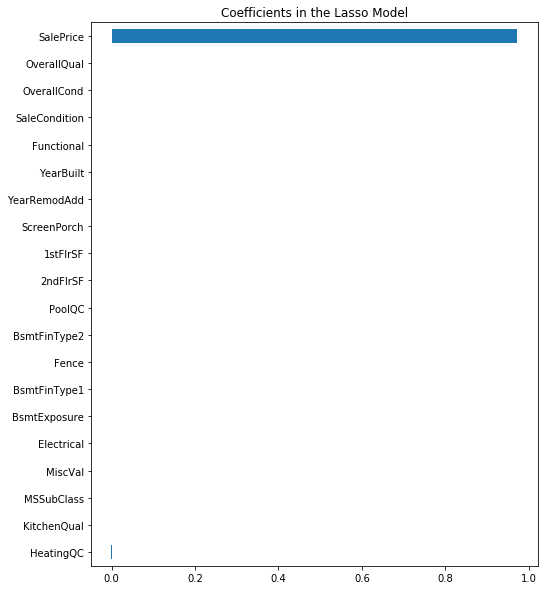

In [42]:
coef = pd.Series(model_lasso.coef_, index = X_train.columns)
#print(“Lasso picked “ + str(sum(coef != 0)) + “ variables and eliminated the other “ + str(sum(coef == 0)) + “ variables”)
imp_coef = pd.concat([coef.sort_values().head(10),
                     coef.sort_values().tail(10)]) 
plt.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")

https://www.lancard.com/blog/2018/06/11/kaggle%E3%82%92%E8%A9%A6%E3%81%97%E3%81%A6%E3%81%BF%E3%81%9F/

# SVR

In [45]:
from sklearn import preprocessing
sc=preprocessing.StandardScaler()
sc.fit(X_train,y)  # StandardScalerの学習
X=sc.transform(X_train)  # 学習結果をもとにX_trainのStandardScalerによる変換

In [ ]:
# test_id
ls = Lasso(alpha = 0.01)
pipeline = make_pipeline(scaler, ls)
pipeline.fit(train_x,train_y)
test_SalePrice = pd.DataFrame(np.exp(pipeline.predict(test_data)),columns=['SalePrice'])
test_Id = pd.DataFrame(test_id,columns=['Id'])
pd.concat([test_Id, test_SalePrice],axis=1).to_csv('../output/output.csv',index=False)
# https://yolo-kiyoshi.com/2018/12/17/post-1003/

# 決定木

目的：決定木とは木構造を用いて分類や回帰を行う機械学習の一つ。　　
分類木と回帰木の総称として決定木という。分類木は対象を分類する問題を解き、回帰木は対象の数値を推定する問題を解く。

# アルゴリズムの種類

In [ ]:
1)CART  
目的変数といくつかの説明変数があるときに、まずは、目的変数を最もよく「分類」する、説明変数の分岐を生成する。これを、ルートノード（root node）  
という。  

2)C4.5(C5.0)  
CARTでは2つにしか分岐させられないが、C4.5では３つ以上にも分岐が可能。  
交差エントロピーと交差エントロピーから求める「Gain比」を利用して、ノードを分割する際に利用する特徴量を判断する。

# 教師ありかなしか

ノンパラメトリックな教師あり学習の手法  
ノンパラメトリックとは母数（パラメータ）によらないことを意味する  
(パラメトリックとは母数（パラメータ)によることを意味する）

# 長所

1)結果をグラフィカルに提示できることから解釈が比較的容易であること

In [ ]:
2)目的変数と説明変数の非線形構造および交互作用を有意義に捉えることができること

In [ ]:
3)説明変数の再コード化等を検討する必要がない

# 短所

In [ ]:
1)目的変数と説明変数によっては、パラメータをどうチューニングしても、望ましいレベルの木構造が得られない場合が多いこと

In [ ]:
2)モデルとしてのロバスト性（頑健性）が弱く、適切でない説明変数が入ると、その変数にモデル全体が引っ張られてしまう

In [ ]:
# 決定木
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor()
tree.fit(X_train,y)
y_pred = tree.predict(X_train)
#tree_mse = mean_squared_error(y_pred,y)
print("DecisionTree RMSE:",np.sqrt(tree_mse))

# Keras

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor

def create_model(optimizer='adam'):
    model = Sequential()
    model.add(Dense(X_train.shape[1], input_dim=X_train.shape[1], kernel_initializer='normal', activation='relu'))
    model.add(Dense(16, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))

    model.compile(loss='mean_squared_error', optimizer=optimizer)
    return model

model = KerasRegressor(build_fn=create_model, verbose=0)
# define the grid search parameters
optimizer = ['SGD','Adam']
batch_size = [10, 30, 50]
epochs = [10, 50, 100]
param_grid = dict(optimizer=optimizer, batch_size=batch_size, epochs=epochs)
reg_dl = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)
reg_dl.fit(X_train, y_train)
# https://qiita.com/katsu1110/items/a1c3185fec39e5629bcb

In [ ]:
# submission
submission = pd.DataFrame({
    "Id": test_ID,
    "SalePrice": y_pred
})
submission.to_csv('houseprice.csv', index=False)
# https://qiita.com/katsu1110/items/a1c3185fec39e5629bcb